# IDS703/ECE684 Natrual Language Processing Final Project FA22: MBTI Classification
## Name: Xiaoyu Chen, Beibei Du, Xianchi Zhang
## Date: December 19, 2022

## Motivation
- We are interested in the MBTI personality test because it is trending recently. There are websites showing us people's personaility types and we want to know if that validates in real life to classify people in these 16 types and how people's MBTI type is related to the posts that they have posted online. When we meet new people, we always ask someone's MBTI type on the first day and that's very interesting to see if there's only common patterns among the people with the same MBTI types. Currently, there are a lot of social apps taking MBTI as an option of input of personal information. We did some research and found out that the dating app such as `Coffee Meets Bagel` has an option to put user's MBTI type, which potentially can be a predictor of choosing the other users. Beyond sakes of socialize, it can be useful in finding the right track for personal growth. Beibei has taken a required course in high school called CornerStone and this is a class to help students find their career path. And MYers & Briggs Type Indicator(MBTI) was being adopted in this class. With the wide-spread usage of MBTI personality test, we want to take this as our project to answer our interested research questions in the `Research Question` portion.


## Introduction
- Myers and her mother Briggs developed a system to distingusih people's personalities by 16 types and it's orgianlly based on their subjective data collection.
- Additionally, there are a lot of controversies/bias in this personality indicator test. Based on the [1], the creation of this personality exam is based on the common trend or consistent preference appeared in Isabel Myers and her mother Katharine Cook Briggs's(They are the two developers of the MBTI personality test) relatvies and friends, and the sample size is only about 20. Thus it can't be statistically significant to design a test in this way. Larger samples are taken later for the validity of the design of the test. It is not heaviily relied on theories in psychology.
- For those who haven't taken the test before and interested in it, here is the link [2] https://www.16personalities.com/free-personality-test.

## Research Question
- We are trying to use Natural Language Processing models to answer the following questions.

1. Can we predict MBTI type from posts that they have sent online?
2. Do people with different MBTI types use different words in their posts?
3. Is there a word that distingusih each MBTI type from the others?
4. Do Introverted and Extroverted types use different words in their posts?
5. Do Intuitive and Sensing types use different words in their posts?
6. Do Thinking and Feeling types use different words in their posts?
7. Do Judging and Perceiving types use different words in their posts?

## Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# bag of words
# https://www.mygreatlearning.com/blog/bag-of-words/

# ngrams
# https://pypi.org/project/ngram/

# naive bayes
from sklearn.naive_bayes import MultinomialNB


## Data Loading, Data Exploration/Cleaning and EDA

In [4]:
mbti = pd.read_csv("mbti_1.csv")
mbti.head()


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


There are two columns in this dataset and there are 8675 observations. The first column is `type`, which is one of the personality type in the Myers-Briggs Type Indicator (MBTI). The second column is `posts`, which is the text of the posts of the users. The  post is separated by `|` in each row.

In [5]:
mbti.shape


(8675, 2)

In [6]:
mbti.dtypes


type     object
posts    object
dtype: object

In [7]:
mbti.describe()


,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [8]:
# We have 8675 rows and 2 columns so that we need to disable max rows in order to run the code in the next block
# alt.data_transformers.disable_max_rows()


In [9]:
# plot the distribution of the 16 personality types
# alt.Chart(mbti).mark_bar().encode(
#     alt.X('type', title='Personality Type'),
#     alt.Y('count()', title='Count')
# ).properties(
#     title='Distribution of Personality Types'
# )


<AxesSubplot:title={'center':'Distribution of Personality Types'}>

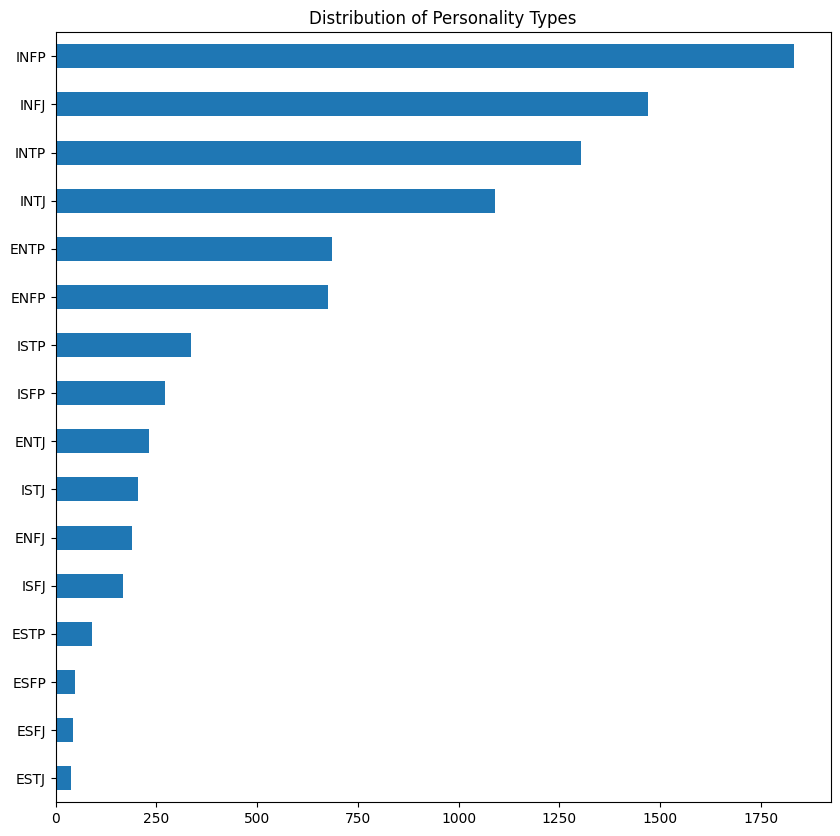

In [10]:
# sort the distribution of personalities in ascending order and plot the distribution of personalities in a bar chart
mbti["type"].value_counts().sort_values(ascending=True).plot(
    kind="barh", figsize=(10, 10), title="Distribution of Personality Types"
)


In [11]:
# find out the number of characters in each post
mbti["posts_length"] = mbti["posts"].apply(len)


In [12]:
# mbti['posts_length'].describe()
mbti.groupby("type")["posts_length"].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ENFJ,190.0,7487.552632,1598.839419,1168.0,6774.25,7833.0,8657.75,10090.0
ENFP,675.0,7319.644444,1582.620497,194.0,6562.00,7548.0,8460.50,10042.0
ENTJ,231.0,7223.731602,1498.276235,1989.0,6425.00,7450.0,8303.50,9904.0
ENTP,685.0,7111.381022,1509.322795,1535.0,6257.00,7378.0,8230.00,10020.0
ESFJ,42.0,7400.571429,1924.953305,2218.0,6202.50,7625.5,9078.50,10077.0
ESFP,48.0,6056.687500,2069.628872,1793.0,4336.75,6435.5,7822.50,9188.0
ESTJ,39.0,7138.666667,1447.123960,4004.0,6130.00,7258.0,8044.50,9855.0
ESTP,89.0,6808.382022,1620.572244,1818.0,5656.00,7092.0,7953.00,9931.0
INFJ,1470.0,7507.227891,1528.227698,820.0,6662.25,7816.5,8635.75,10058.0


### We tried to spilt up the four options in to each of the 2 options, which ends up the potential 16 personalities: 2^4 = 16

In [13]:
mbti["Introverted"] = mbti["type"].apply(lambda x: 1 if x[0] == "I" else 0)
mbti["Extroverted"] = mbti["type"].apply(lambda x: 1 if x[0] == "E" else 0)
mbti["Intuitive"] = mbti["type"].apply(lambda x: 1 if x[1] == "N" else 0)
mbti["Sensing"] = mbti["type"].apply(lambda x: 1 if x[1] == "S" else 0)
mbti["Feeling"] = mbti["type"].apply(lambda x: 1 if x[2] == "F" else 0)
mbti["Thinking"] = mbti["type"].apply(lambda x: 1 if x[2] == "T" else 0)
mbti["Perceiving"] = mbti["type"].apply(lambda x: 1 if x[3] == "P" else 0)
mbti["Jugding"] = mbti["type"].apply(lambda x: 1 if x[3] == "J" else 0)


## Data Modeling

- The first model that we are going to use here is Naive Bayes and it takes about ~6 seconds to run and the accuracy for this model is very low: 21.32%

In [14]:
# we will use the posts column as the feature and the type column as the target
X = mbti["posts"]
y = mbti["type"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# use tfidf to convert the text into a matrix of token counts
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# use naive bayes to train the model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# predict the personality type of the test data
y_pred_nb = nb.predict(X_test_tfidf)

# check the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_nb)


0.2132564841498559

- The following model is using Support Vector Machine Algorithm and it will takes around ~7 min to finish and the accuracy for this model is about 60.98% 

In [15]:
# use svm to predict the personality type of a person based on the text of their posts using tfidf

# use svm to train the model
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_tfidf, y_train)

# predict the personality type of the test data
y_pred_svm = svm.predict(X_test_tfidf)

# check the accuracy of the model
accuracy_score(y_test, y_pred_svm)


0.6097982708933718

- The third model is MLP Classifier and it takes about ~4 minutes to run and the accuracy is about 60.46%  

In [16]:
# use neural network to train the model
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(X_train_tfidf, y_train)

# predict the personality type of the test data
y_pred_nn = nn.predict(X_test_tfidf)

# check the accuracy of the model
accuracy_score(y_test, y_pred_nn)


0.6034582132564842

In [17]:
# use pickle to save the model and this is not working for now
import pickle

pickle.dump(nb, open("nb_1.sav", "wb"))
pickle.dump(nn, open("nn_2.sav", "wb"))

# load the model
nb_1 = pickle.load(open("nb_1.sav", "rb"))
nn_2 = pickle.load(open("nn_2.sav", "rb"))

nb_1


MultinomialNB()

In [18]:
# store the results in a dataframe
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_nb})
results


,Actual,Predicted
2802,INTP,INFP
2166,INTJ,INFP
1919,INTP,INFP
360,ENFP,INFP
1115,ENTJ,INFP
...,...,...
7023,ISFJ,INFP
6696,INTP,INFP
6746,INFJ,INFP
7966,ISTJ,INFP


In [19]:
# pip install tensorflow


In [20]:
# pip install torch

# use pytoch to train the model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix


In [22]:
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


[[  7   1   0   0   0   0   0   0  12  17   3   0   0   0   1   0]
 [  0  76   0   3   0   0   0   0  10  25   4   6   0   0   0   1]
 [  2   1  16   5   0   0   0   0   5   2  10   3   0   0   0   0]
 [  0  11   0  68   0   0   0   0  13  13  13  16   0   1   0   0]
 [  0   1   0   1   1   0   0   0   0   1   1   1   0   0   1   0]
 [  0   3   0   2   0   0   0   0   0   2   0   0   0   1   0   0]
 [  0   0   1   0   0   0   0   0   1   2   2   1   0   0   0   0]
 [  0   1   0   1   0   0   0   2   1   2   0   4   0   0   0   4]
 [  0   4   0   8   0   0   0   0 191  49  21  15   0   0   0   0]
 [  3   9   0   5   0   0   0   0  33 289  14  12   0   3   1   1]
 [  0   1   2   1   0   0   0   0  20  17 128  24   0   0   0   0]
 [  0   5   0   9   0   0   0   0  18  31  19 206   0   2   0   3]
 [  0   4   0   0   0   0   0   0  11  14   1   2  13   0   0   0]
 [  0   3   0   2   0   0   0   0   2  26   4   3   0  12   0   1]
 [  1   1   0   1   0   0   0   0   5  10  11   3   0   1   9 

/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# # create a class for the dataset
# class MBTIDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y
#         self.tfidf = TfidfVectorizer()
#         self.X = tensor(self.tfidf.fit_transform(self.X))
#         self.y = tensor(self.y.values)

#     def __len__(self):
#         return self.X.shape[0]

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]

# # create a class for the neural network
# class MBTINet(nn.Module):
#     def __init__(self):
#         super(MBTINet, self).__init__()
#         self.fc1 = nn.Linear(20000, 1000)
#         self.fc2 = nn.Linear(1000, 16)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # create a function to train the model
# def train(model, train_loader, optimizer, criterion, epochs):
#     model.train()
#     for epoch in range(epochs):
#         for batch_idx, (data, target) in enumerate(train_loader):
#             optimizer.zero_grad()
#             output = model(data)
#             loss = criterion(output, target)
#             loss.backward()
#             optimizer.step()

# # create a function to test the model
# def test(model, test_loader, criterion):
#     model.eval()
#     test_loss = 0
#     correct = 0
#     with torch.no_grad():
#         for data, target in test_loader:
#             output = model(data)
#             test_loss += criterion(output, target).item()
#             pred = output.argmax(dim=1, keepdim=True)
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     test_loss /= len(test_loader.dataset)

#     print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

# # create a function to predict the personality type of a person based on the text of their posts
# def predict(model, test_loader):
#     model.eval()
#     with torch.no_grad():
#         for data, target in test_loader:
#             output = model(data)
#             pred = output.argmax(dim=1, keepdim=True)
#             return pred

# # create a dataset for the training data
# train_dataset = MBTIDataset(X_train, y_train)

# # create a dataset for the testing data
# test_dataset = MBTIDataset(X_test, y_test)


# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# model = MBTINet()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# train(model, train_loader, optimizer, criterion, 10)
# test(model, test_loader, criterion)
# predict(model, test_loader)


## Results

## Conclusion

## Reference

# put link into a markdown cell
[1] https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/original-research.htm

[2] https://www.16personalities.com/free-personality-test